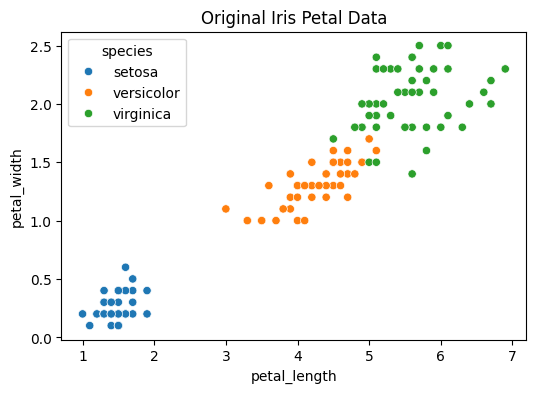

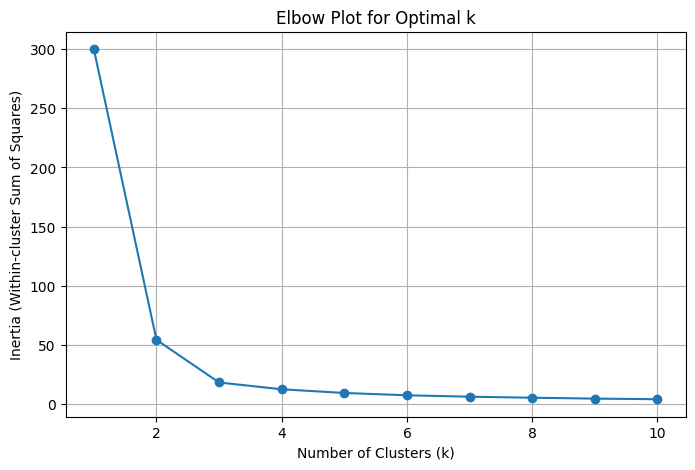

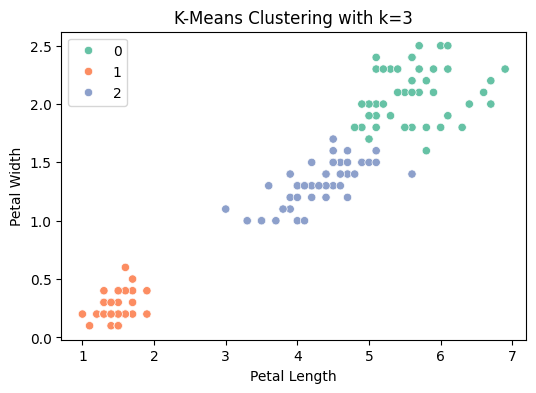

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
iris = pd.read_csv("iris.csv")

# Step 2: Use only petal length and petal width for clustering
X = iris[['petal_length', 'petal_width']]

# Optional: Visualize original data (not clustered)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='petal_length', y='petal_width', hue=iris['species'], data=iris)
plt.title("Original Iris Petal Data")
plt.show()

# Step 3: Preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Step 5: Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Plot for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.grid(True)
plt.show()

# Step 6: Apply KMeans with optimal k (e.g., 3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Step 7: Plot clustered data
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X['petal_length'], y=X['petal_width'], hue=clusters, palette='Set2')
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
